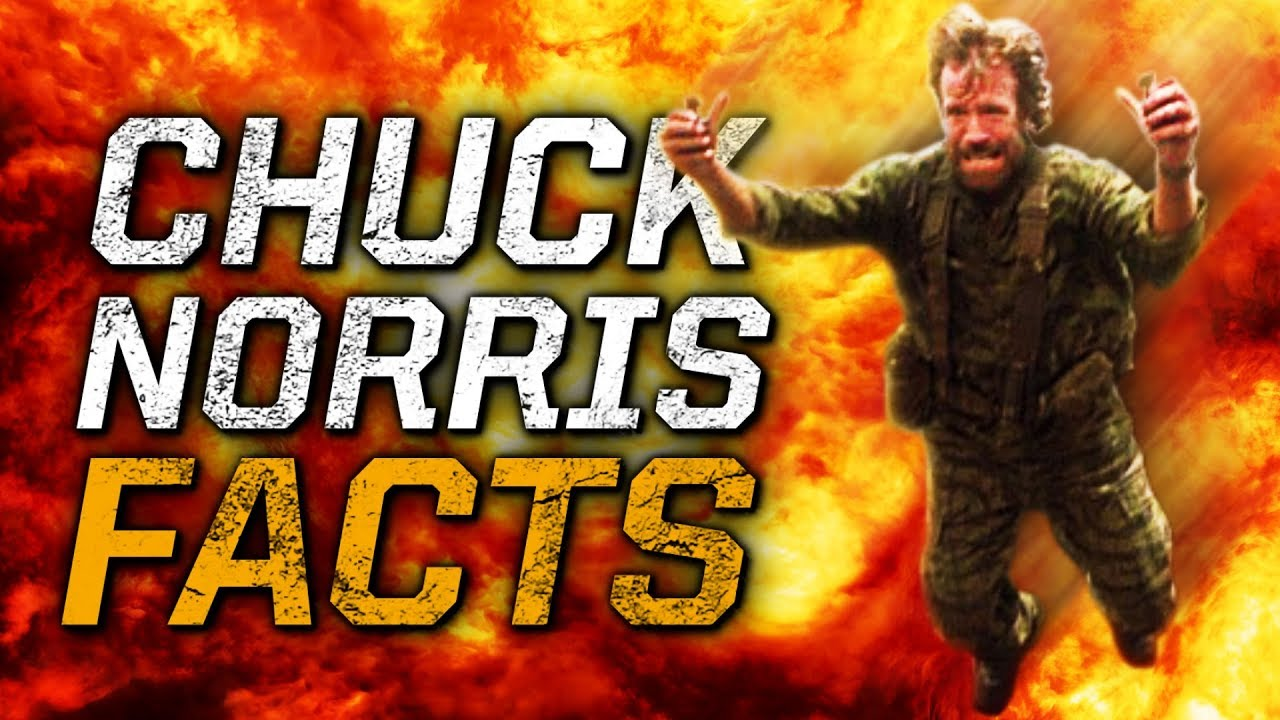

## Objectif
Concevoir un agent / bot qui interroge une page web, extraie des données,
alimente une base de données et réalise un reporting simplifié.

## Conditions à remplir

1 script Python fonctionnel, reproductible, commenté et disponible sur Github

1 table SQL alimentée et respectant les conditions demandées

1 rapport simplifié sur les données de la base : des indicateurs statistiques et 1 graphique

1 Trello du projet

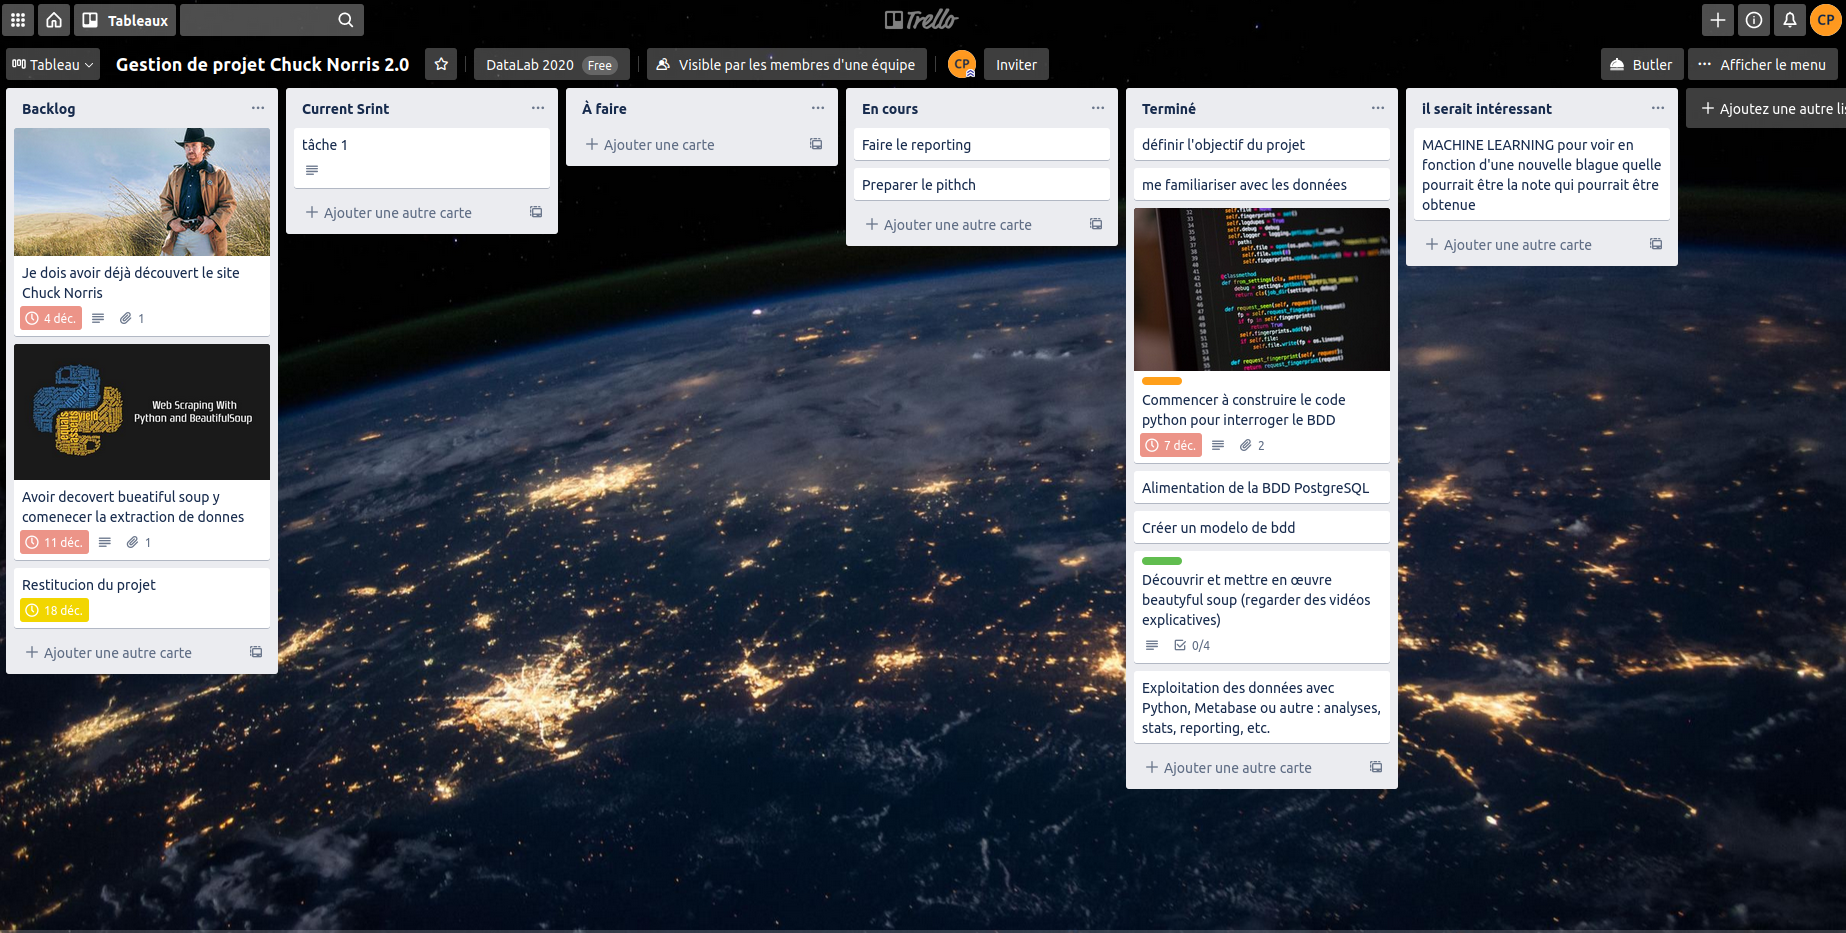

## Selector

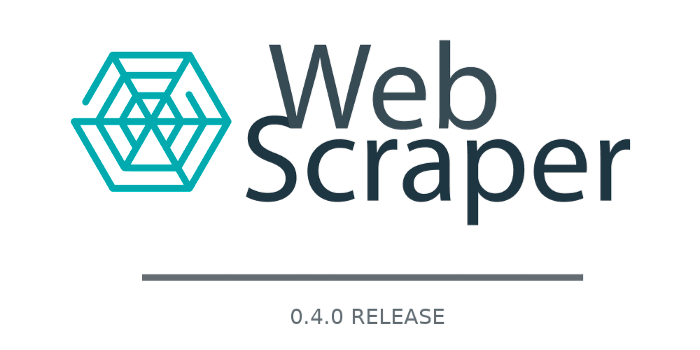

## Beautifulsoup & Requests

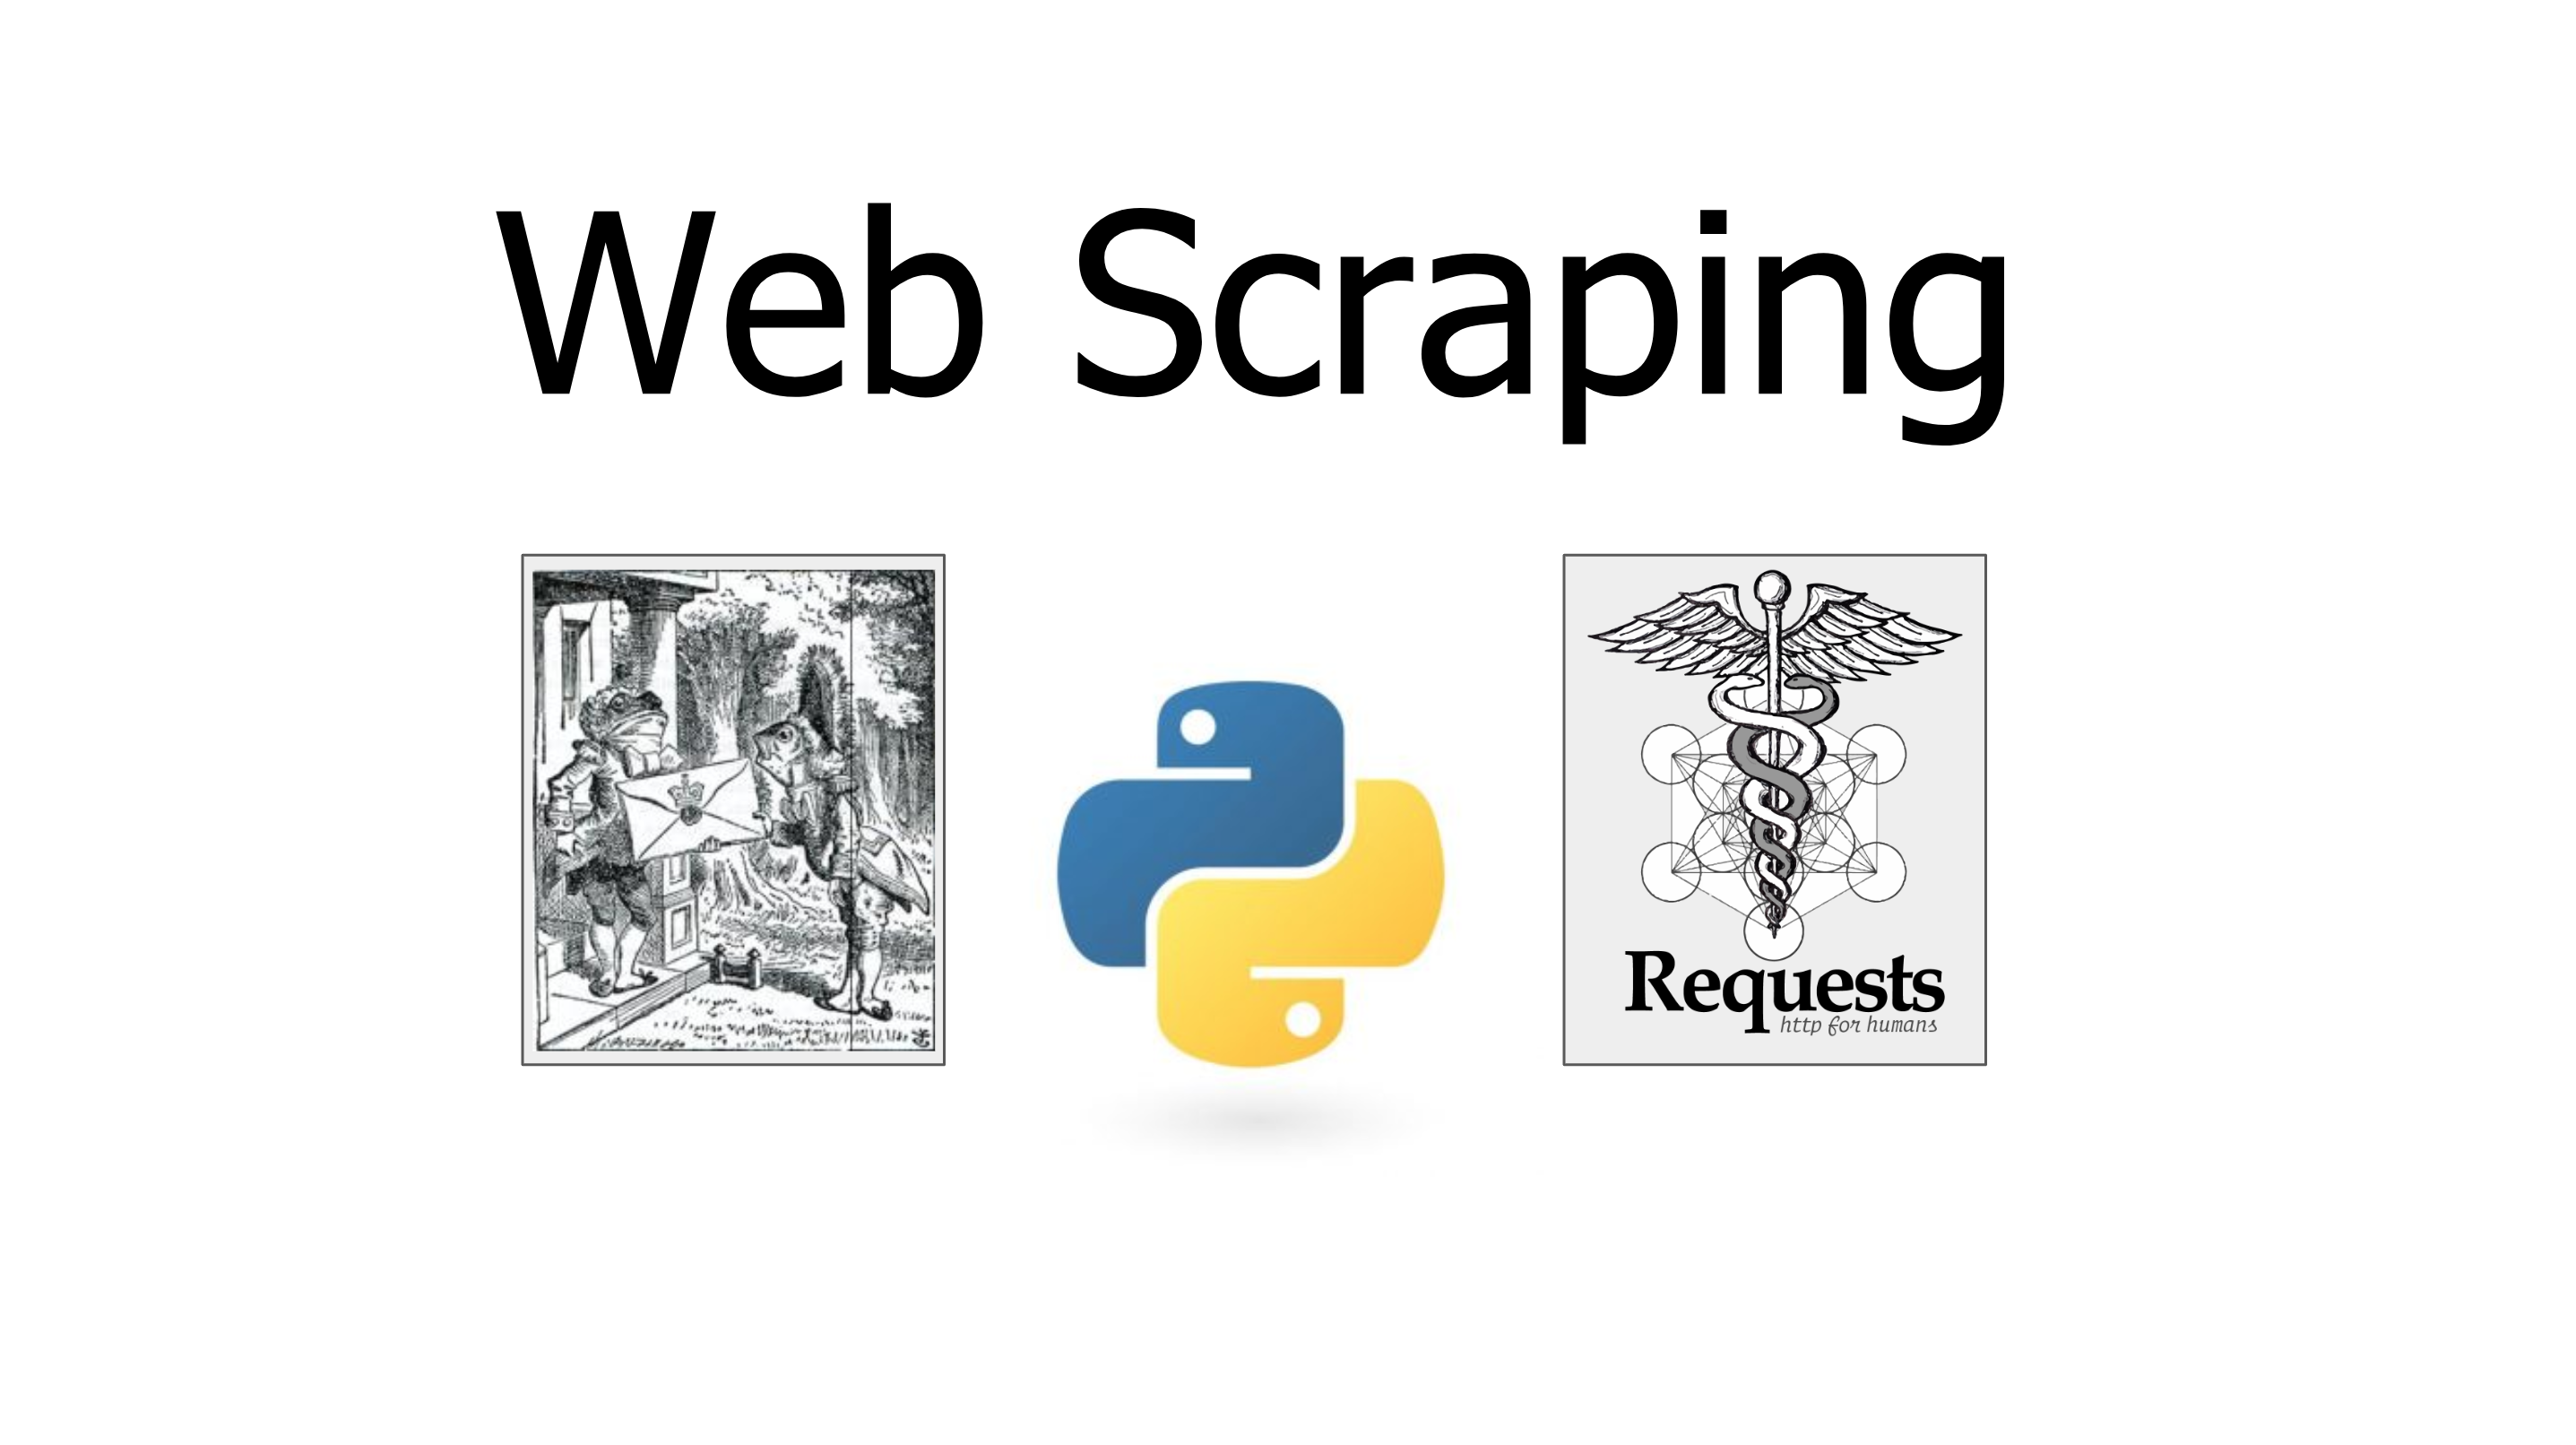

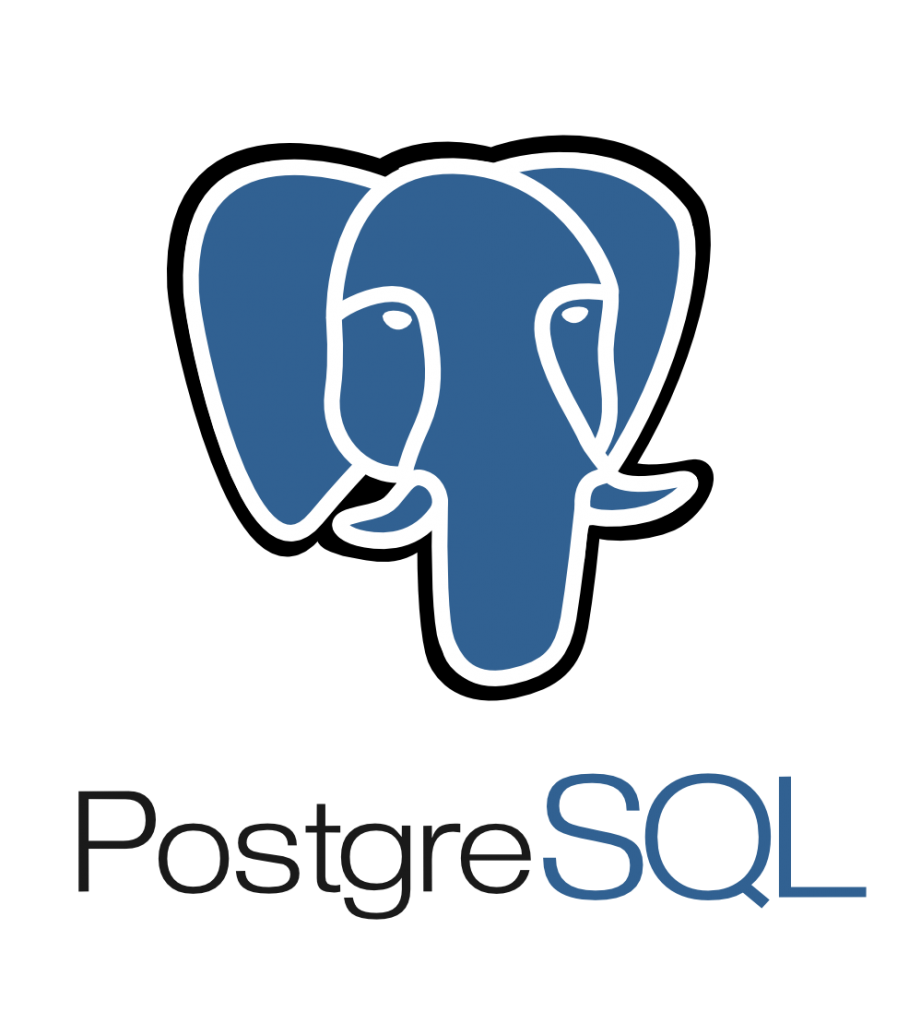

In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  6 20:20:56 2020

@author: César
"""

import pandas as pd
from sqlalchemy import create_engine #Nous utiliserons sqlalchemy pour établir la connexion avec la base de données postgres
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import config #il s'agit d'un fichier .py dans lequel le nom d'utilisateur et le mot de passe sont enregistrés

server = "127.0.0.1" 
BDname="bdd_cparra"
cnx = create_engine(f"postgres://{config.user}:{config.password}@{server}/{BDname}")



def histogramme():
    print("")
    print("Vous devez arrêter le moteur de recherche en disant que vous ne souhaitez pas faire plus de recherches pour afficher ce graphique")
    sql = """SELECT rate
    FROM "ChuckNorrisDate" 
    INNER JOIN "ChuckNorris" ON "ChuckNorrisDate".id = "ChuckNorris".id
    WHERE date = '2020-12-17';""" 
    df = pd.read_sql(sql, cnx)
    
    plt.figure(figsize=(8, 6))
    sns.histplot(df.loc[:,['rate']], bins = 30)
    plt.title('Distribution des notes des blagues')

def statistiques():
    print("Indicateurs statistiques")
    print("")
    sql = """SELECT rate, vote
    FROM "ChuckNorrisDate" 
    INNER JOIN "ChuckNorris" ON "ChuckNorrisDate".id = "ChuckNorris".id
    WHERE date = '2020-12-17';""" 
    df = pd.read_sql(sql, cnx)
    
    print(df.describe())
    


def Graphiques_et_statistiques():
    sortir = False
    option = 0
    while not sortir:
        print("Indicateurs statistiques et graphiques")
        print("""
     Vous souhaitez rechercher par:
    
    1) Statistiques
    2) Histogramme des notes            
            """)
        
        option = demander_nombre_entier()
     
        if option == 1:
            return statistiques()
        elif option == 2:
            return histogramme()
    
        elif option ==0:
            return un_nouveau_depart() # retourne au menu principal
        
        else:
            print('')
            print ("Entrez un nombre compris entre 1 et 2")


def par_sujet(): # exécuter la fonction pour Les blagues par sujet
    # Dans cette fonction, toutes les options sont stockées dans une liste et en fonction de ce que l'utilisateur choisit, elle sera ajoutée à la recherche SQL
    print("Blagues / Par sujet")
    print("""
    Quel type de sujet souhaitez-vous rechercher?
        
    1) Sexe        5) Coup de pied      9) Infini           13) Ordinateurs
	2) Pierres     6) Univers          10) Construction     14) Internet
	3) Fleurs      7) Chromosomes      11) Où est Charlie            
	4) Guerre      8) Oiseaux          12) Français
    """)

    list_type = ['sex', 'rock', 'flower', 'war', 'kick', 'universe', 'chromosomes', 'bird', 'infinity', 'build', 'Waldo', 'French', 'computer', 'Internet']
    type1 = demander_nombre_entier()
    
    if type1 < 0 or type1 > 14: #cette ligne permet d'éviter une erreur si l'utilisateur choisit un numéro différent de celui de la liste
        print ("Entrez un nombre compris entre 1 et 14")
    elif type1 == 0:
        blagues()
    else:
        print (f"Blagues / Par sujet / {list_type[type1-1]}")
    
    sql = f"""SELECT "ChuckNorrisDate".id, rate, vote, fact
        FROM "ChuckNorrisDate" 
        INNER JOIN "ChuckNorris" ON "ChuckNorrisDate".id = "ChuckNorris".id
        WHERE date = '2020-12-17' AND fact like '% {list_type[type1-1]}%'
        ORDER BY vote DESC 
        LIMIT 50;"""
    #print("SQL:", sql)
    df = pd.read_sql(sql, cnx)
    for i in range(df['fact'].size):
        print("")
        print(df.iloc[i]['vote'], df.iloc[i]['fact']) # Ici, cette notation est utilisée pour pouvoir montrer toute la blague et bien la lire



def par_mot(): # exécuter la fonction pour Les blagues liées à un mot
    print("Blagues / Liées à un mot")
    mot = input("Quel mot? ")
    
    sql = f"""SELECT "ChuckNorrisDate".id, rate, vote, fact
        FROM "ChuckNorrisDate" 
        INNER JOIN "ChuckNorris" ON "ChuckNorrisDate".id = "ChuckNorris".id
        WHERE date = '2020-12-17' AND fact like '% {mot}%'
        ORDER BY vote DESC 
        LIMIT 50;"""
    #print("SQL:", sql)
    df = pd.read_sql(sql, cnx)
    for i in range(df['fact'].size):
        print("")
        print(df.iloc[i]['vote'], df.iloc[i]['fact'])


def blagues():
    sortir = False
    option = 0
    while not sortir:
        print("Blagues")
        print("""
     Vous souhaitez rechercher par:
    
    1) Blagues liées à un mot
    2) Blagues par sujet                
            """)
        
        option = demander_nombre_entier()
     
        if option == 1:
            return par_mot() 
        elif option == 2:
            return par_sujet() 
        elif option ==0:
            return un_nouveau_depart() # retourne au menu principal
        
        else:
            print('')
            print ("Entrez un nombre compris entre 1 et 2")
    


def qui_ont_diminue(): # exécuter la fonction pour Les blagues qui ont diminué leur valeur 
    print("Popularité / Qui ont diminué leur valeur ")
    sql = """SELECT J.id,fact,D1.rate,D2.rate, D2.rate-D1.rate AS diff 
    FROM "ChuckNorris" AS J
    INNER JOIN "ChuckNorrisDate" AS D1 ON (J.id=D1.id AND D1.date='2020-12-07')
    INNER JOIN "ChuckNorrisDate" AS D2 ON (J.id=D2.id AND D2.date='2020-12-17')
    WHERE ((D1.vote!=D2.vote) AND (D1.rate>D2.rate))
    ORDER BY diff LIMIT 20;""" 
    #print("SQL:", sql)
    df = pd.read_sql(sql, cnx)
    for i in range(df['fact'].size):
        print("")
        print(df.iloc[i]['fact'], 'a diminué', df.iloc[i]['diff'], 'sur cinq')


def la_pire(): # exécuter la fonction pour la pire blague
    print("Popularité / La pire")
    sql = """SELECT "ChuckNorrisDate".id, rate, vote, fact
        FROM "ChuckNorrisDate" 
        INNER JOIN "ChuckNorris" ON "ChuckNorrisDate".id = "ChuckNorris".id
        WHERE date = '2020-12-17' 
        ORDER BY rate ASC 
        LIMIT 1;""" 
    #print("SQL:", sql)
    df = pd.read_sql(sql, cnx)
    print("")
    print(df.iloc[0]['fact'])

def superieure_a_4(): # exécuter la fonction pour score supérieur à:
    print("Popularité / Supérieur à:")
    ponctuation = input("Choisissez un nombre entre un et quatre: ")
    
    sql = f"""SELECT COUNT(rate)
        FROM "ChuckNorrisDate" 
        INNER JOIN "ChuckNorris" ON "ChuckNorrisDate".id = "ChuckNorris".id
        WHERE date = '2020-12-17' AND rate > {ponctuation};""" 
    #print("SQL:", sql)
    df = pd.read_sql(sql, cnx)
    numero = df.iloc[0]['count']
    print("")
    print(f"Il y a {numero} blagues")

def les_meilleures(): # exécuter la fonction pour Les meilleures blagues
    print("Popularité / Les meilleures")
    numero = input("Combien de blagues voulez-vous voir? ")
    
    sql = f"""SELECT "ChuckNorrisDate".id, rate, vote, fact, date
        FROM "ChuckNorrisDate" 
        INNER JOIN "ChuckNorris" ON "ChuckNorrisDate".id = "ChuckNorris".id
        WHERE date = '2020-12-17' 
        ORDER BY vote DESC 
        LIMIT {numero};"""   
    #print("SQL:", sql)
    df = pd.read_sql(sql, cnx)
    for i in range(df['fact'].size):
        print("")
        print(df.iloc[i]['vote'], df.iloc[i]['fact'])
    
    
def popularite():
    sortir = False
    option = 0
    while not sortir:
        print("Popularité")
        print("""
     Vous souhaitez rechercher par:
    
    1) Les meilleures blagues
    2) Combien de blagues ont un score supérieur à:
    3) Quelle est la pire blague ?
    4) Les blagues qui ont diminué leur valeur           
            """)
        
        option = demander_nombre_entier()
     
        if option == 1:
            return les_meilleures() 
        elif option == 2:
            return superieure_a_4() 
        elif option == 3:
            return la_pire() 
        elif option == 4:
            return qui_ont_diminue()
        elif option == 0:
            return un_nouveau_depart() # retourne au menu principal
        
        else:
            print('')
            print ("Entrez un nombre compris entre 1 et 3")



def un_nouveau_depart(): 
    sortir = False
    option = 0
    while not sortir:
        print("\nBienvenue dans le moteur de recherche Sql de la Base de données de notre cher ami Chuck Norris")
        print("""
    Vous souhaitez rechercher par:
    
    1) Popularité
    2) Type de blague
    3) Indicateurs statistiques et graphiques
            """)
        print('')
        print("A tout moment vous pouvez utiliser 0 pour retourner")
        option = demander_nombre_entier()
     
        if option == 1:
            popularite()  # exécuter la fonction pour la sélection de Popularité            
            
            autre_rech = input('Voulez-vous faire une autre recherche?(o/n) ')
            if autre_rech == "o":
                un_nouveau_depart()    
            else:
                print("")
                print("Merci beaucoup d'utiliser notre service de recherche. \nNous espérons que vous avez eu une expérience agréable.")
                break
                
        elif option == 2:
            blagues() # exécuter la fonction pour la sélection de Type de blague
            
            autre_rech = input('Voulez-vous faire une autre recherche?(o/n) ')# On lance à nouveau la première recherche en utilisant la fonction section_principale()
            if autre_rech == "o":
                un_nouveau_depart()    
            else:
                print("")
                print("Merci beaucoup d'utiliser notre service de recherche. \nNous espérons que vous avez eu une expérience agréable.")
                break
                        
        elif option == 3:
            Graphiques_et_statistiques() # exécuter la fonction pour les graphiques et indicateurs statistiques
            
            autre_rech = input('Voulez-vous faire une autre recherche?(o/n) ')# On lance à nouveau la première recherche en utilisant la fonction section_principale()
            if autre_rech == "o":
                un_nouveau_depart()    
            else:
                print("")
                print("Merci beaucoup d'utiliser notre service de recherche. \nNous espérons que vous avez eu une expérience agréable.")
                break
        
        else:
            print('')
            print ("Choississez 1, 2 où 3")
            

# Selecteur des sous menus ou des requêtes sql à effectuer utilisés dans l'ensemble du moteur de recherche
def demander_nombre_entier():
 
    correct=False
    num=0
    while(not correct):
                      
        try:
            num = int(input("Choisissez le numéro d'une option: "))
            correct=True
        except ValueError:
            print('Vous devez entrer un nombre entier')
     
    return num


In [ ]:
un_nouveau_depart()


Bienvenue dans le moteur de recherche Sql de la Base de données de notre cher ami Chuck Norris

    Vous souhaitez rechercher par:
    
    1) Popularité
    2) Type de blague
    3) Indicateurs statistiques et graphiques
            

A tout moment vous pouvez utiliser 0 pour retourner


## Indicateurs statistiques

En ce qui concerne la notation, nous pouvons voir qu'au total il y a 5308 blagues qui ont été classées, avec une moyenne de 3,25, avec un score minimum de 1,28 et un maximum de 4,12, selon l'écart type de 0,55 on peut en déduire que la notation il est concentré autour de la note moyenne.

Et par raport à le nombre de votes, nous pouvons voir qu'il y a aussi 5308 qui ont reçu un vote, en moyenne les blagues ont reçu 122,56 votes, celle qui a reçu le moins de votes a obtenu 5 votes et celle qui a reçu le plus grand nombre de votes a obtenu 9265 votes, sur d'après l'écart type élevé de 552,61, nous pouvons en déduire que dans ce cas, il n'y a pas de concentration mais plutôt qu'ils sont répartis entre les différentes valeurs


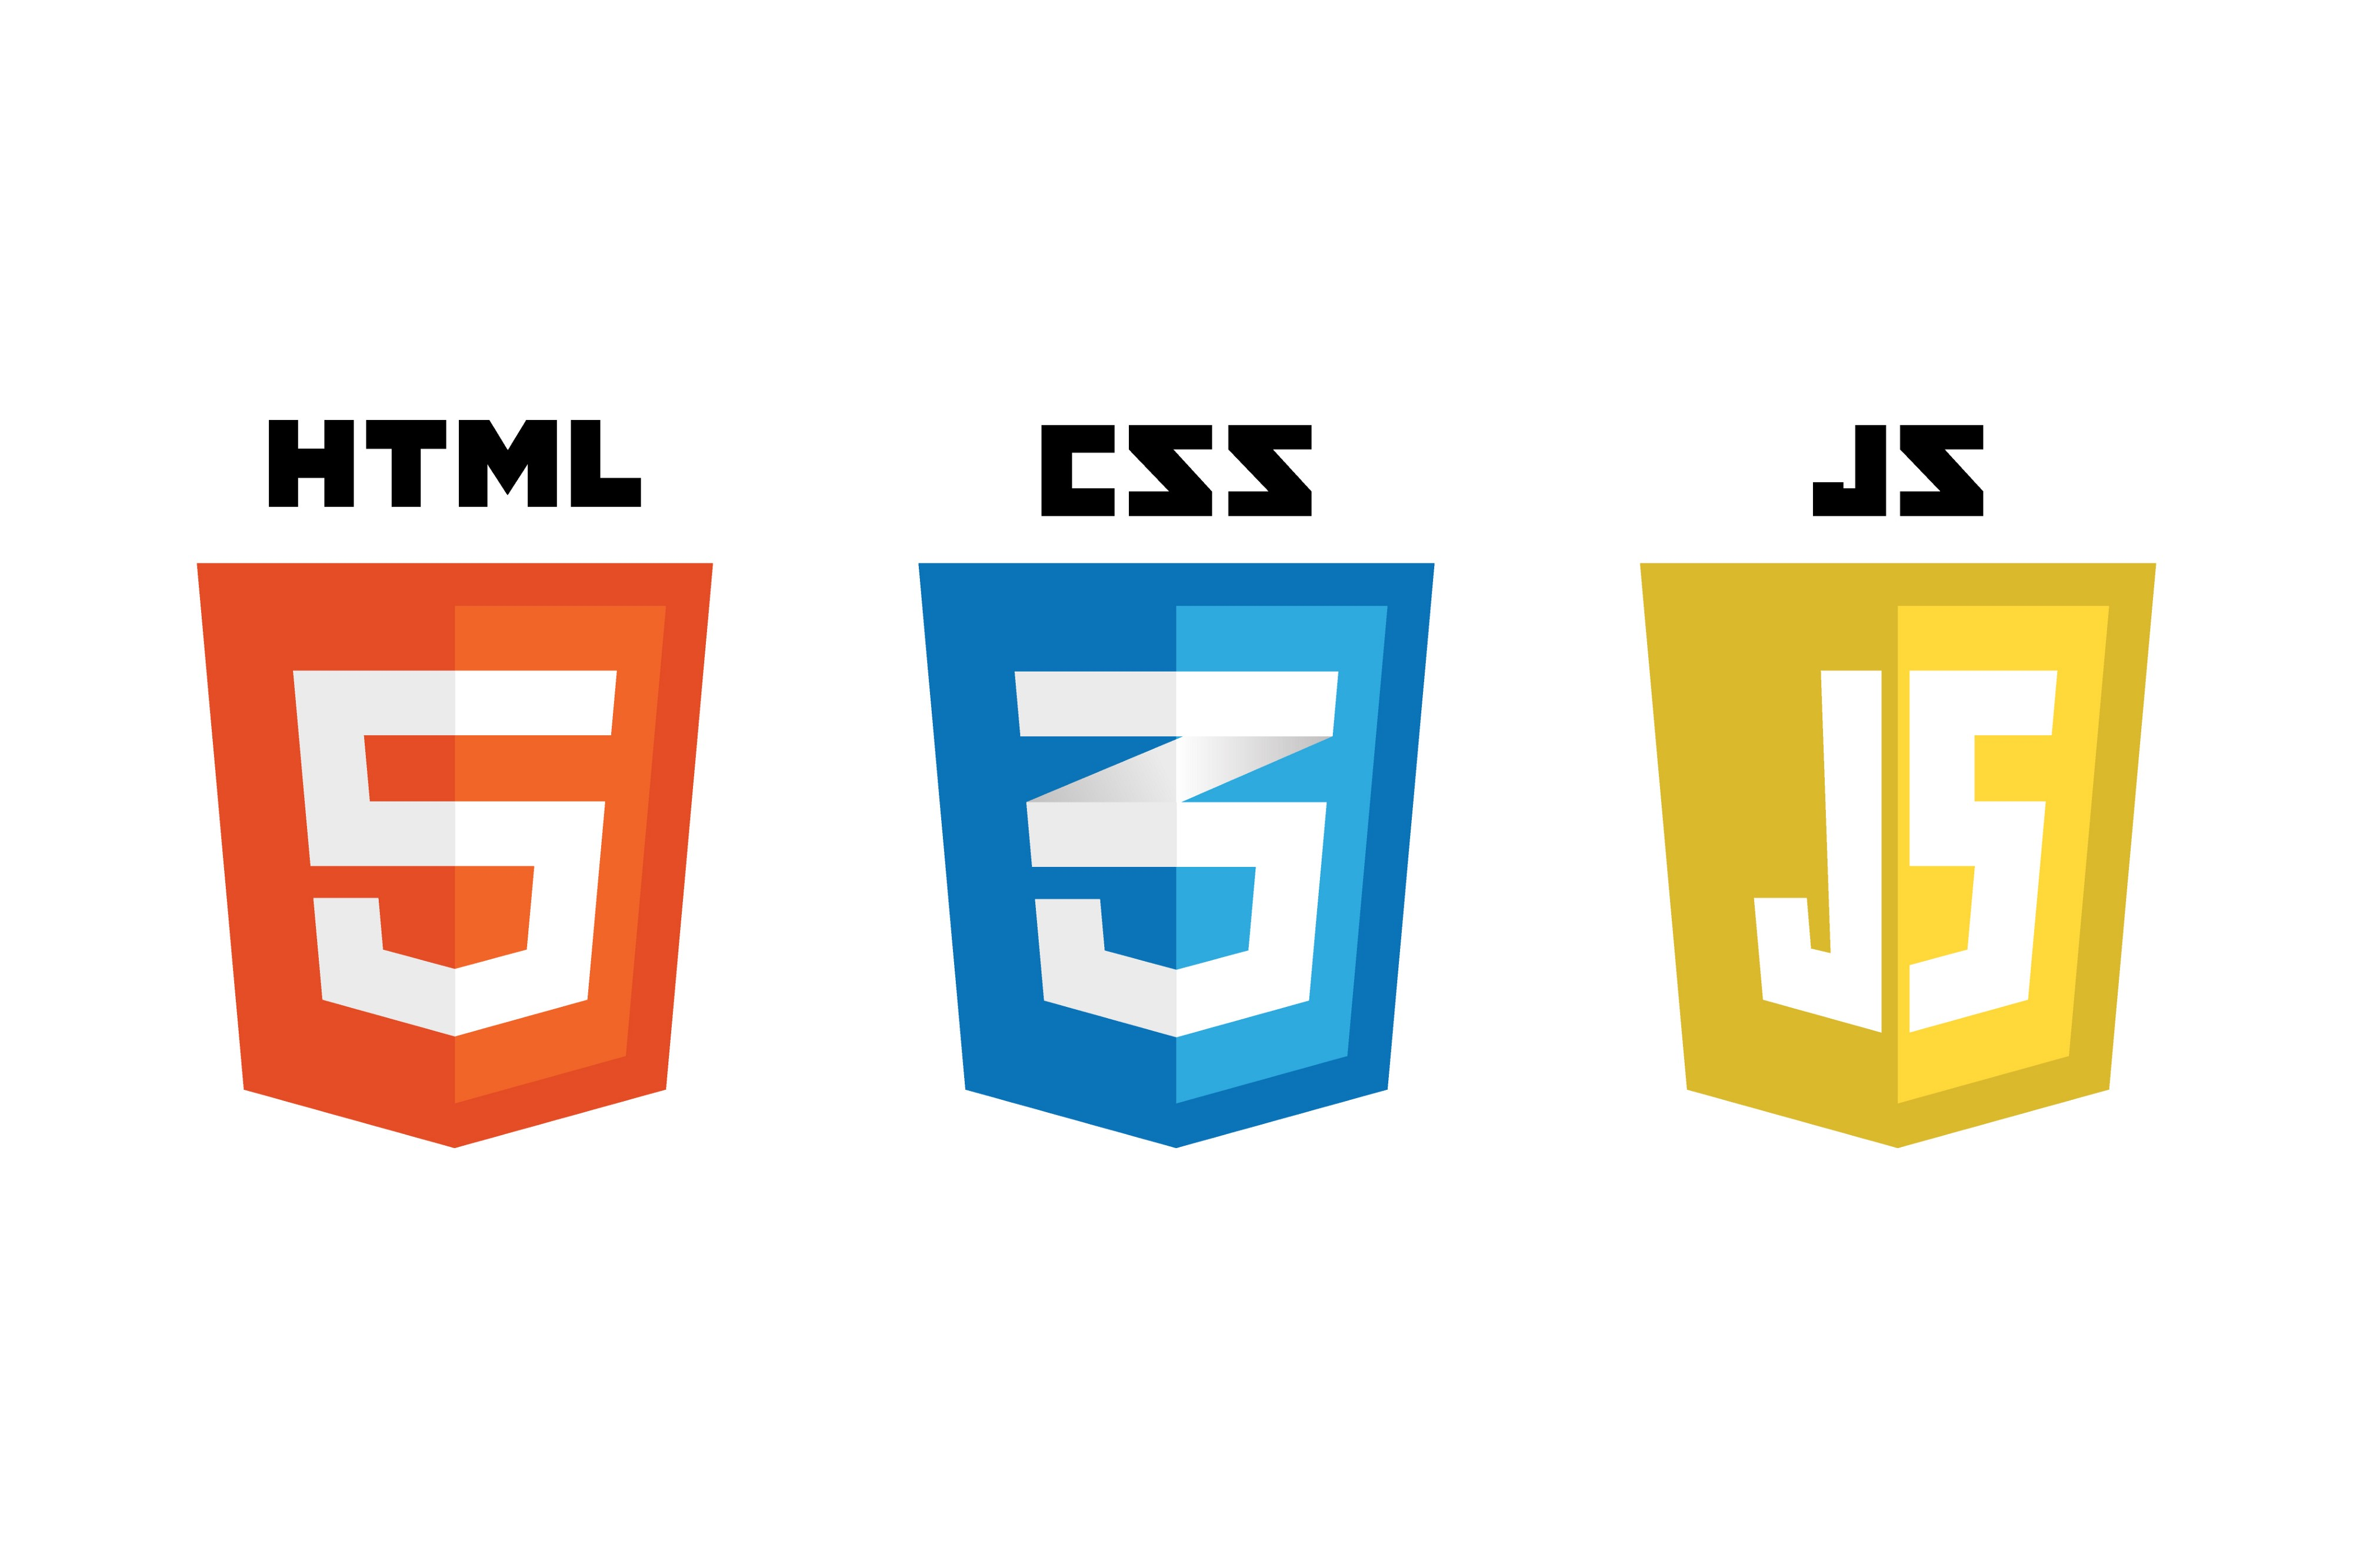

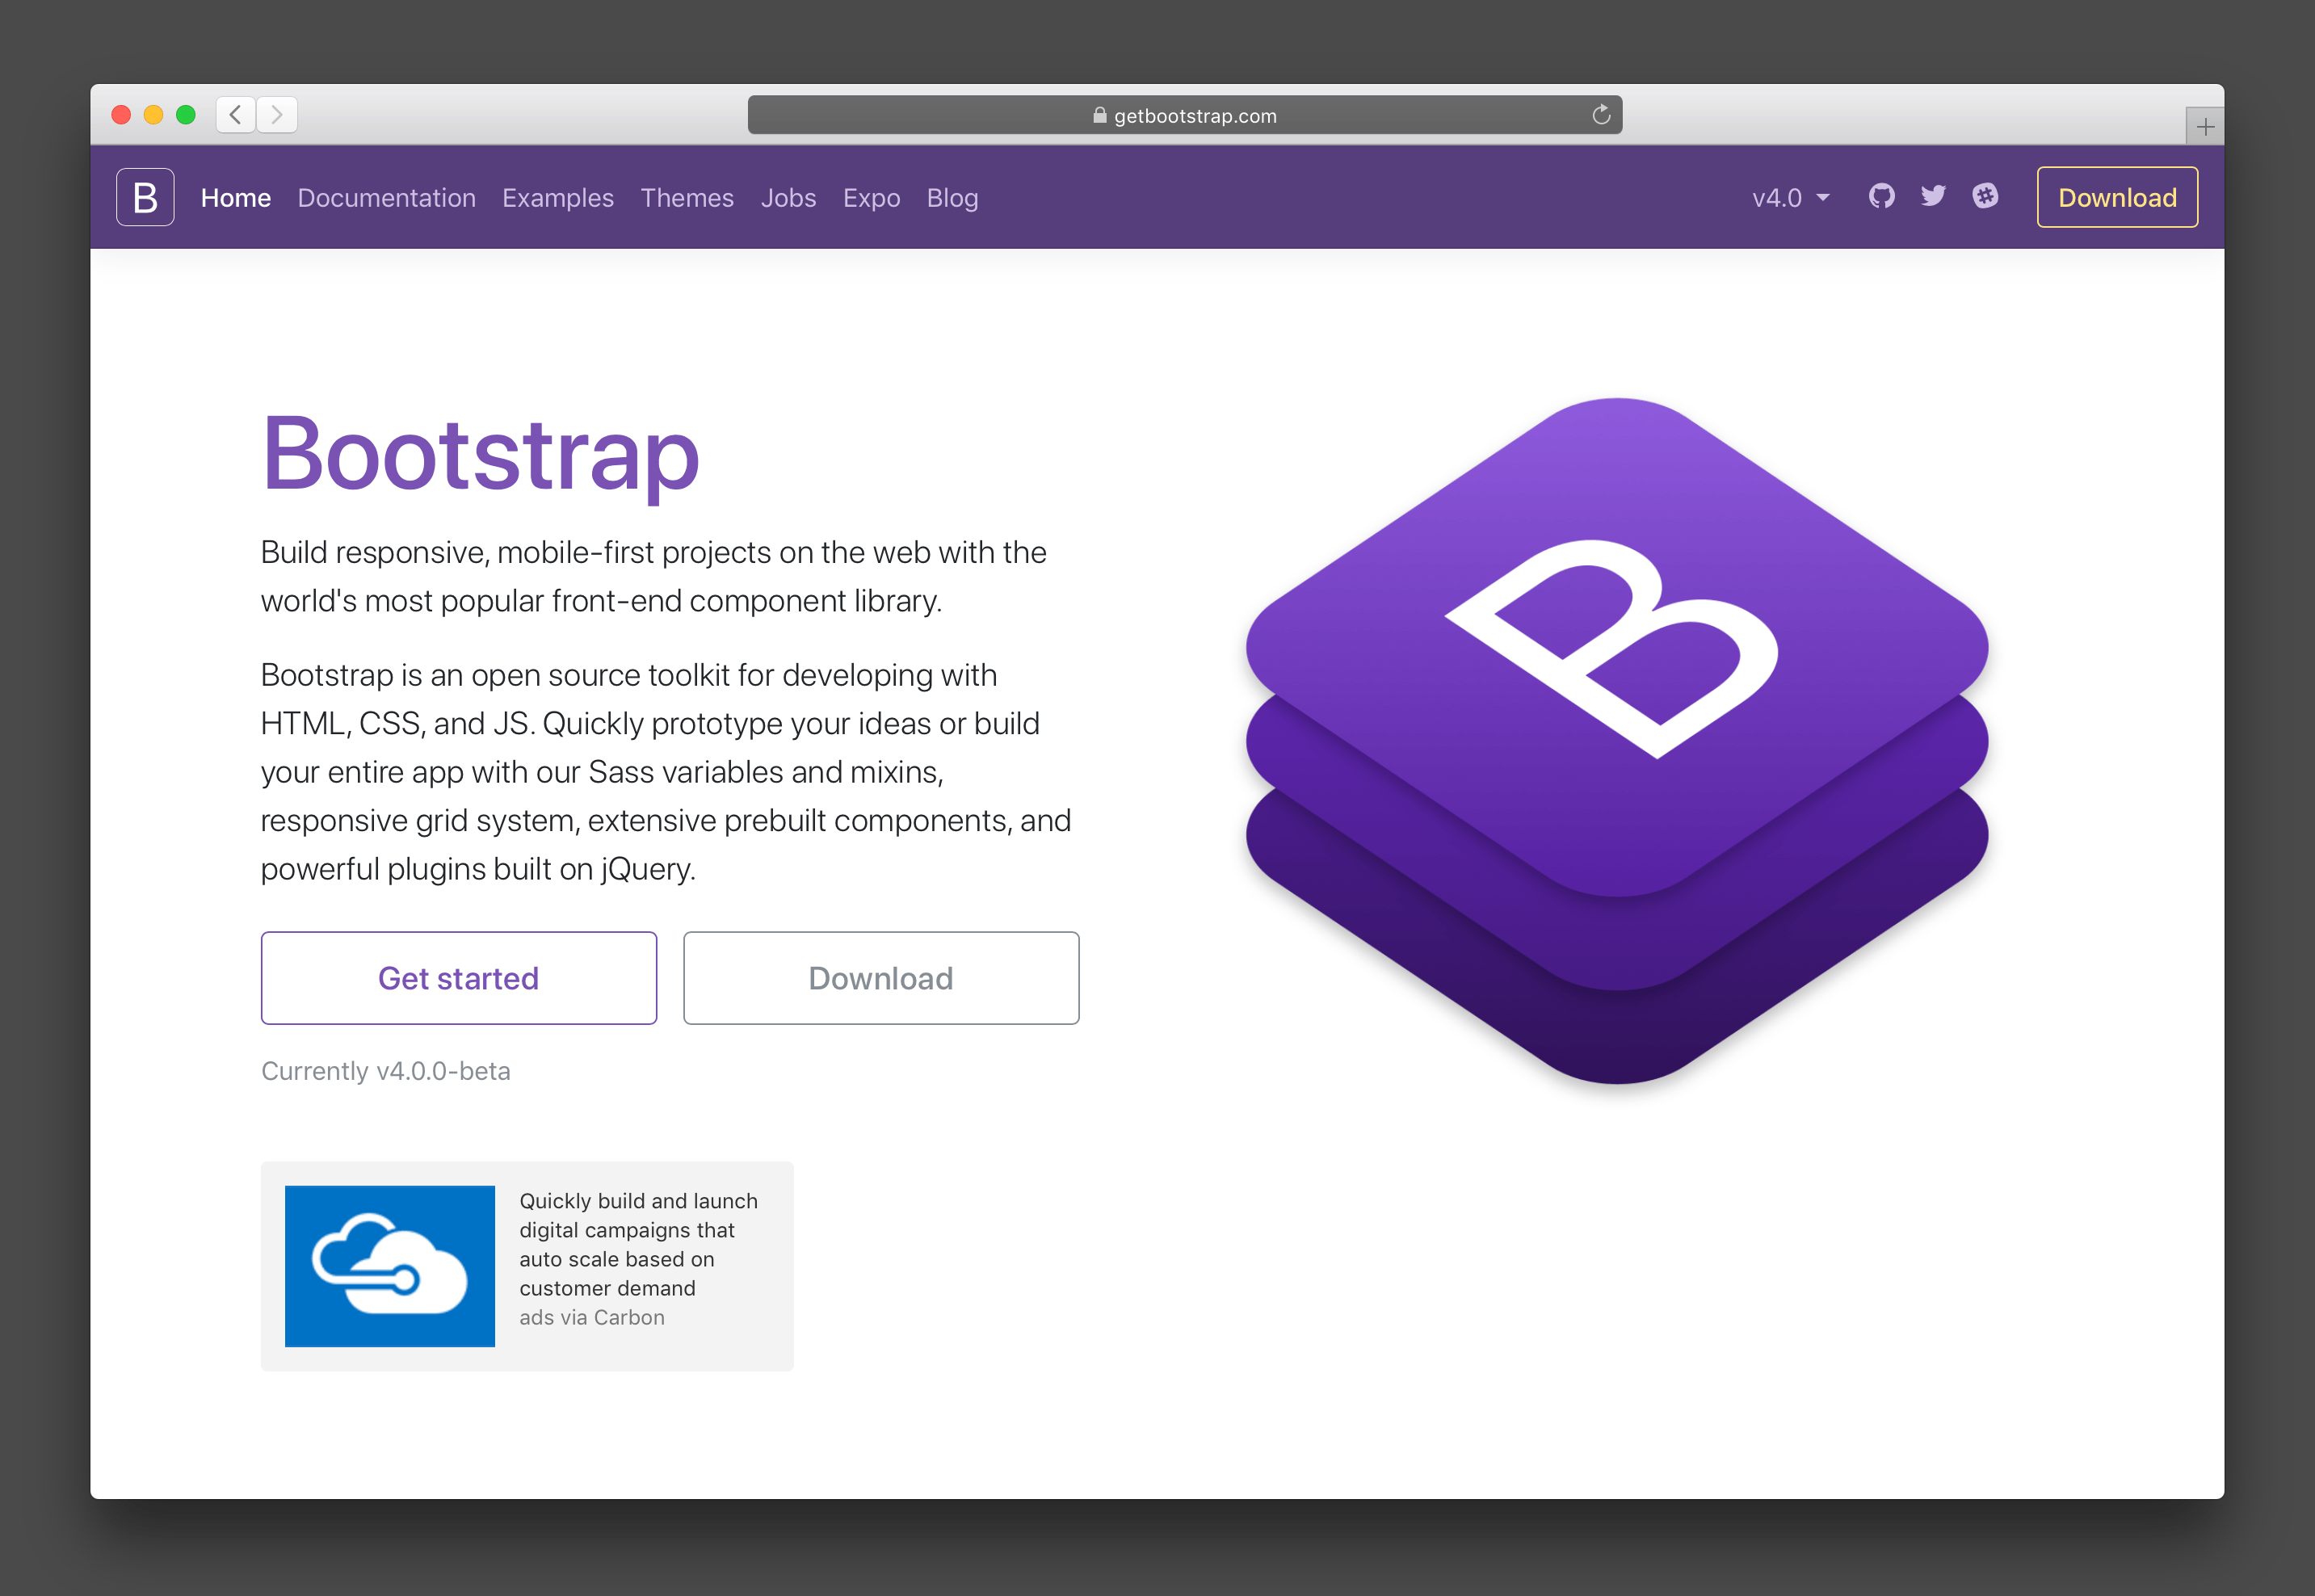

In [10]:
import webbrowser

# Ouvrir un fichier HTML dans le navigateur Web
url = "file:////home/formateur/uno/projet_3/Entrega_final/Graphs_et_tableau_Norris/tableaux _20201217.html"
webbrowser.open(url,new=2)

True

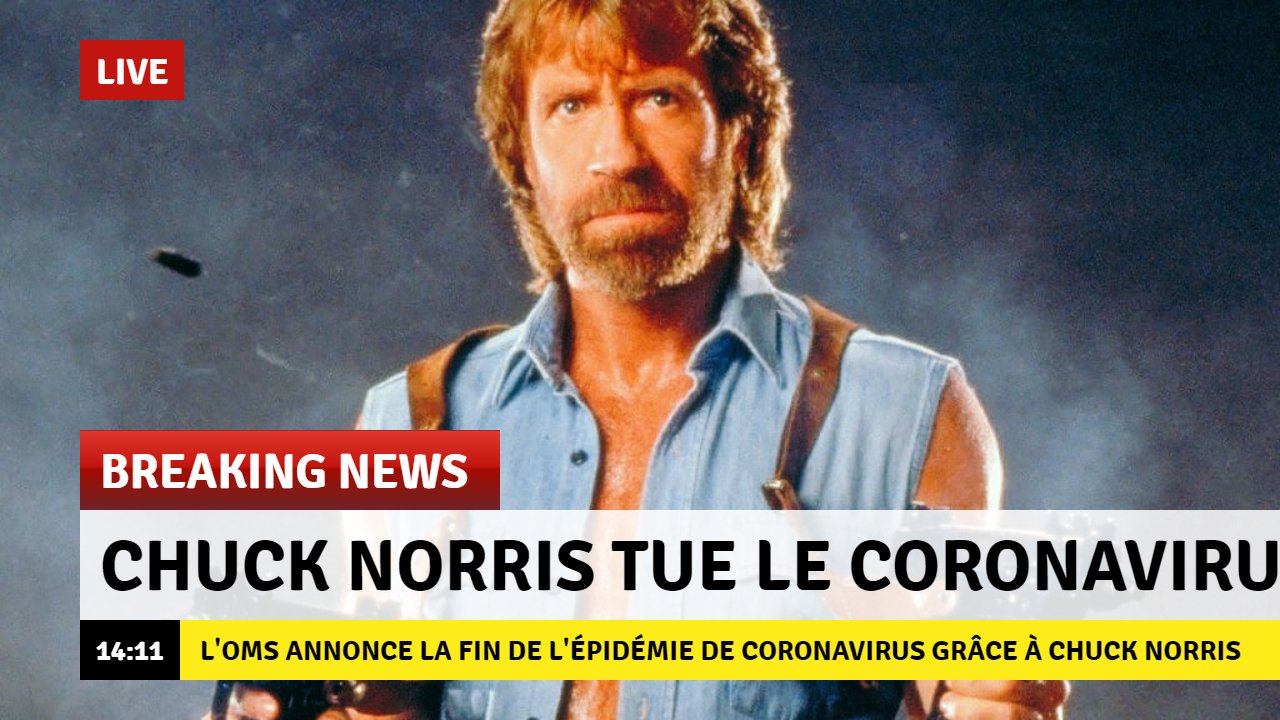